__[Datenquelle](https://www.kaggle.com/datasets/jessemostipak/volcano-eruptions?resource=download)__ 

# Vulkane der Welt

### Importieren der notwendigen Bibliotheken, zum Kennenlernen und Analysieren.

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# from sklearn import 
# from scipy.stats import randint

### Laden der Daten

In [2]:
volcano = pd.read_csv('volcano.csv')
#eruption = pd.read_csv('eruption.csv')
#events = pd.read_csv('events.csv')
#sulfur = pd.read_csv('sulfur.csv')
#tree_rings = pd.read_csv('tree_rings.csv')

### Übersicht über die Daten

In [3]:
print(volcano.head())

   volcano_number     volcano_name primary_volcano_type last_eruption_year  \
0          283001              Abu            Shield(s)              -6850   
1          355096       Acamarachi        Stratovolcano            Unknown   
2          342080       Acatenango    Stratovolcano(es)               1972   
3          213004  Acigol-Nevsehir              Caldera              -2080   
4          321040            Adams        Stratovolcano                950   

         country                          region  \
0          Japan         Japan, Taiwan, Marianas   
1          Chile                   South America   
2      Guatemala      México and Central America   
3         Turkey  Mediterranean and Western Asia   
4  United States          Canada and Western USA   

                               subregion  latitude  longitude  elevation  ...  \
0                                 Honshu    34.500    131.600        641  ...   
1  Northern Chile, Bolivia and Argentina   -23.292    -6

In [4]:
print(volcano.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            958 non-null    int64  
 1   volcano_name              958 non-null    object 
 2   primary_volcano_type      958 non-null    object 
 3   last_eruption_year        958 non-null    object 
 4   country                   958 non-null    object 
 5   region                    958 non-null    object 
 6   subregion                 958 non-null    object 
 7   latitude                  958 non-null    float64
 8   longitude                 958 non-null    float64
 9   elevation                 958 non-null    int64  
 10  tectonic_settings         958 non-null    object 
 11  evidence_category         958 non-null    object 
 12  major_rock_1              958 non-null    object 
 13  major_rock_2              958 non-null    object 
 14  major_rock

In [5]:
volcano.describe(include = 'all')

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
count,958.000000,958,958,958,958,958,958,958.000000,958.000000,958.000000,...,958,958,958,958,958,958,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02
unique,NaN,954,26,342,89,19,98,NaN,NaN,NaN,...,11,11,11,9,3,1,NaN,NaN,NaN,NaN
top,NaN,"Azul, Cerro",Stratovolcano,Unknown,United States,South America,Kamchatka Peninsula,NaN,NaN,NaN,...,,,,,,,NaN,NaN,NaN,NaN
freq,NaN,2,353,301,99,117,60,NaN,NaN,NaN,...,917,734,871,930,956,958,NaN,NaN,NaN,NaN
mean,298585.325678,NaN,NaN,NaN,NaN,NaN,NaN,14.984680,23.537475,1867.027140,...,NaN,NaN,NaN,NaN,NaN,NaN,4.786046e+04,6.121775e+04,3.040444e+05,2.730174e+06
std,49792.657247,NaN,NaN,NaN,NaN,NaN,NaN,31.584983,109.852596,1401.545901,...,NaN,NaN,NaN,NaN,NaN,NaN,2.986690e+05,3.023860e+05,7.354221e+05,5.690981e+06
min,210010.000000,NaN,NaN,NaN,NaN,NaN,NaN,-78.500000,-179.970000,-2500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,263025.000000,NaN,NaN,NaN,NaN,NaN,NaN,-5.401500,-78.282750,881.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.325000e+01,4.080000e+02,1.139775e+04
50%,300055.500000,NaN,NaN,NaN,NaN,NaN,NaN,14.514000,36.393500,1622.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.950000e+02,1.633500e+03,1.391800e+04,3.546460e+05
75%,343088.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.798250,131.045500,2548.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.642000e+03,2.073025e+04,2.565210e+05,2.981102e+06


### Wo liegen die Vulkane

<font color='orange'><b>Note: </b> Negative Latituden (Breitengrade) repräsentieren die südliche Hemisphere, und negative Longituden (Längengrade) repräsentieren die westliche Hemisphere.
<fontv>

In [6]:
# wie viele Vulkane sind auf der Nordhalbkugel - wie viele auf der Südhalbkugel
volcano_north = (volcano['latitude'] >= 0).sum()
volcano_south = (volcano['latitude'] <= 0).sum()
print(volcano_north)
print(volcano_south)

655
303


In [7]:
# wie viele Vulkane sind auf der Westhalbkugel - wie viele auf der Osthalbkugel
volcano_east = (volcano['longitude'] >= 0).sum()
volcano_west = (volcano['longitude'] <= 0).sum()
print(volcano_east)
print(volcano_west)

542
416


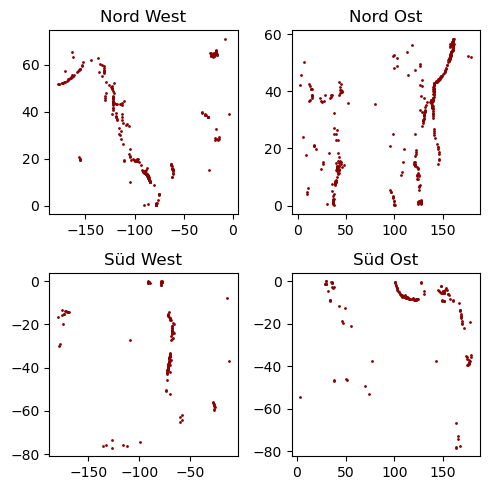

In [8]:
# Erstellen der Daten für die vier Quadranten
nord_ost = [] # x > 0 & y > 0
nord_west = [] # x < 0 & y > 0
sued_west = [] # x < 0 & y < 0
sued_ost = [] # x > 0 & y < 0

# Zusammenfügen der Datenpaare
coordinates = []
for index, row in volcano.iterrows():
    coordinates.append([row['latitude'], row['longitude']])

# Konvertieren in ein NumPy-Array
coordinates = np.array(coordinates)

# Teilen der Koordinatenpaare in Quadranten
nord_ost = coordinates[(coordinates[:, 0] > 0) & (coordinates[:, 1] > 0)]
sued_ost = coordinates[(coordinates[:, 0] < 0) & (coordinates[:, 1] > 0)]
sued_west = coordinates[(coordinates[:, 0] < 0) & (coordinates[:, 1] < 0)]
nord_west = coordinates[(coordinates[:, 0] > 0) & (coordinates[:, 1] < 0)]

# Plotten der Koordinatenpaare in den entsprechenden Quadranten
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

axs[0, 1].scatter(nord_ost[:, 1], nord_ost[:, 0], color='darkred', s=1)
axs[0, 1].set_title('Nord Ost')

axs[1, 0].scatter(sued_west[:, 1], sued_west[:, 0], color='darkred', s=1)
axs[1, 0].set_title('Süd West')

axs[1, 1].scatter(sued_ost[:, 1], sued_ost[:, 0], color='darkred', s=1)
axs[1, 1].set_title('Süd Ost')

axs[0, 0].scatter(nord_west[:, 1], nord_west[:, 0], color='darkred', s=1)
axs[0, 0].set_title('Nord West')

plt.tight_layout()
plt.show()

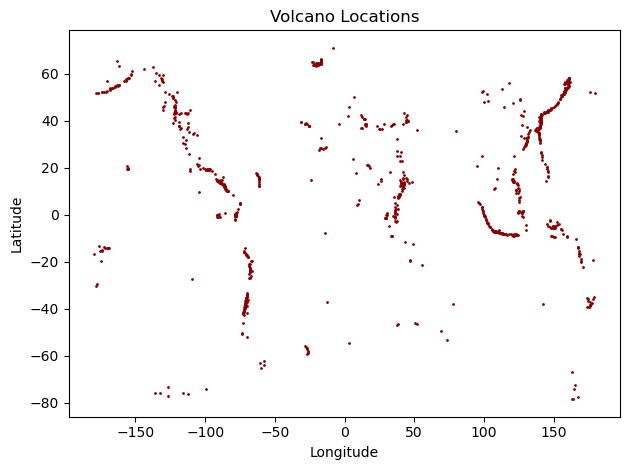

In [9]:
# Zusammenfügen der Datenpaare
coordinates = []
for index, row in volcano.iterrows():
    coordinates.append([row['latitude'], row['longitude']])

# Konvertieren in ein NumPy-Array
coordinates = np.array(coordinates)

plt.scatter(coordinates[:, 1], coordinates[:, 0], color='darkred', s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Volcano Locations')

plt.tight_layout()
plt.show()

### Welche Gesteinstypen herrschen vor

In [10]:
print(volcano['major_rock_1'].unique())
print(volcano['major_rock_1'].nunique())

['Andesite / Basaltic Andesite' 'Dacite' 'Rhyolite'
 'Basalt / Picro-Basalt' 'Trachyte / Trachydacite'
 'Phono-tephrite /  Tephri-phonolite'
 'Trachyandesite / Basaltic Trachyandesite'
 'Trachybasalt / Tephrite Basanite' 'Foidite' 'Phonolite']
10


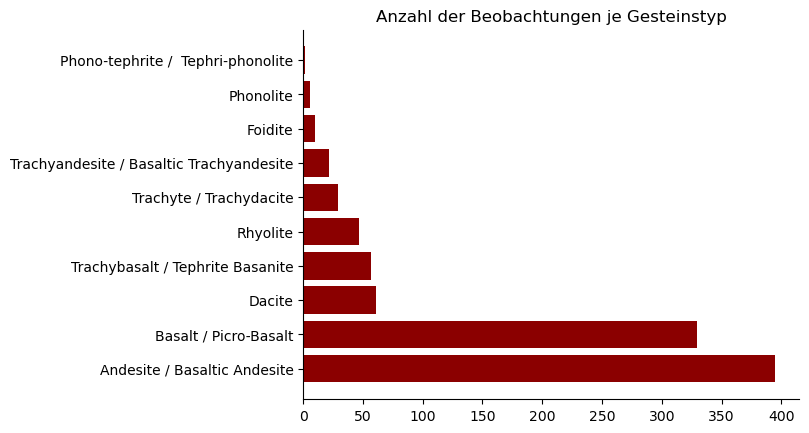

In [11]:
# Zählen der Anzahl der Gesteine
major_rock_1_counts = volcano['major_rock_1'].value_counts()

# Erstellen des Balkendiagramms
plt.barh(major_rock_1_counts.index, major_rock_1_counts.values, color="darkred")

# Beschriftungen hinzufügen
plt.ylabel('')
plt.xlabel('')
plt.title('Anzahl der Beobachtungen je Gesteinstyp')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Diagramm anzeigen
plt.show()

#### <font color="orange">Mögliche Analyse-Frage:</font> Wo befinden sich die Vulkane mit entsprechenden Gesteinsarten, gibt es einen Zusammenhang zwischen der Lage und der Gesteine?

### Welche primären Vulkantypen sind vorhanden

In [12]:
print(volcano.primary_volcano_type.unique())
print(volcano.primary_volcano_type.nunique())

['Shield(s)' 'Stratovolcano' 'Stratovolcano(es)' 'Caldera' 'Submarine'
 'Shield' 'Volcanic field' 'Fissure vent(s)' 'Compound' 'Complex'
 'Pyroclastic shield' 'Pyroclastic cone(s)' 'Pyroclastic cone'
 'Caldera(s)' 'Lava dome(s)' 'Lava cone' 'Crater rows' 'Maar(s)'
 'Tuff cone(s)' 'Complex(es)' 'Subglacial' 'Lava dome' 'Lava cone(s)'
 'Tuff cone' 'Lava cone(es)' 'Stratovolcano?']
26


#### Reinigen der Vulkantypen

Doppelt Bezeichnung der "Lava Cone" als "cone(es)" und "cone(s)". Beide werden zusammengeführt

In [13]:
# Zusammenführen versch. Bezeichnungen des plural Cone((e)s)
volcano['primary_volcano_type'] = volcano['primary_volcano_type'].replace('Lava cone(es)', 'Lava cone(s)')
print(volcano.primary_volcano_type.unique())
print(volcano.primary_volcano_type.nunique())

['Shield(s)' 'Stratovolcano' 'Stratovolcano(es)' 'Caldera' 'Submarine'
 'Shield' 'Volcanic field' 'Fissure vent(s)' 'Compound' 'Complex'
 'Pyroclastic shield' 'Pyroclastic cone(s)' 'Pyroclastic cone'
 'Caldera(s)' 'Lava dome(s)' 'Lava cone' 'Crater rows' 'Maar(s)'
 'Tuff cone(s)' 'Complex(es)' 'Subglacial' 'Lava dome' 'Lava cone(s)'
 'Tuff cone' 'Stratovolcano?']
25


Einfügen einer Weiteren Spalte aufgrund Händelbarkeit der Masse an Vulkantypen. Alle Pluralformen und Vulkanfelder werden als "Vulkansystem" in der Spalte "is_volcano_system" einem Booleanwert zugeführt.

In [14]:
# Erstellen einer neuen Spalte, die angibt, ob ein Vulkan ein System aus mehreren Vulkanen ist
volcano['is_volvano_system'] = volcano['primary_volcano_type'].str.contains(r'\(?s\)|field', case=False, regex=True)

print([volcano.primary_volcano_type, volcano.is_volvano_system])

[0              Shield(s)
1          Stratovolcano
2      Stratovolcano(es)
3                Caldera
4          Stratovolcano
             ...        
953    Stratovolcano(es)
954              Caldera
955               Shield
956               Shield
957       Volcanic field
Name: primary_volcano_type, Length: 958, dtype: object, 0       True
1      False
2       True
3      False
4      False
       ...  
953     True
954    False
955    False
956    False
957     True
Name: is_volvano_system, Length: 958, dtype: bool]


In [15]:
print((volcano.is_volvano_system == True).sum())

346


In [16]:
print((volcano.primary_volcano_type.str.contains('\?')).sum())

1


Kopieren der vorhergehenden Datensammlung, für die weitere Änderungen an der Datensammlung. 

In [17]:
volcano_simpler_types = volcano.copy()

Durch die Einführung der Spalte, die die Systeme einzeln herausstellt, können die Pluralwerte nun durch die Singulare ersetzt werden.

In [18]:
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Stratovolcano(es)', 'Stratovolcano')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Stratovolcano?', 'Stratovolcano')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Shield(s)', 'Shield')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Fissure vent(s)', 'Fissure vent')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Tuff cone(s)', 'Tuff cone')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Maar(s)', 'Maar')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Caldera(s)', 'Caldera')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Lava cone(s)', 'Lava cone')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Lava dome(s)', 'Lava dome')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Complex(es)', 'Complex')
volcano_simpler_types['primary_volcano_type'] = volcano_simpler_types['primary_volcano_type'].replace('Pyroclastic cone(s)', 'Pyroclastic cone')

print(volcano_simpler_types.primary_volcano_type.unique())
print(volcano_simpler_types.primary_volcano_type.nunique())

['Shield' 'Stratovolcano' 'Caldera' 'Submarine' 'Volcanic field'
 'Fissure vent' 'Compound' 'Complex' 'Pyroclastic shield'
 'Pyroclastic cone' 'Lava dome' 'Lava cone' 'Crater rows' 'Maar'
 'Tuff cone' 'Subglacial']
16


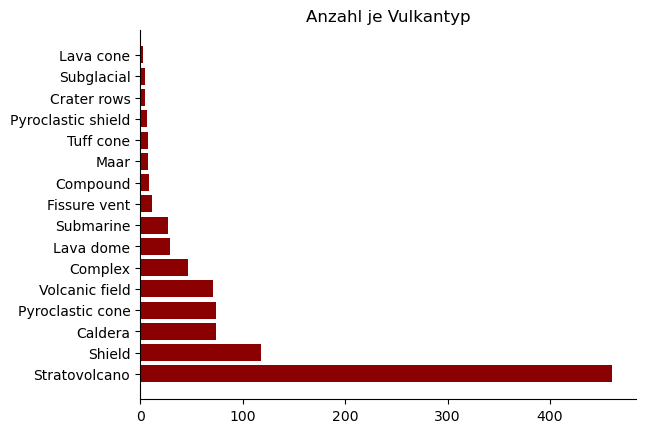

In [19]:
# Zählen der Anzahl der Gesteine
primary_volcano_type_counts = volcano_simpler_types['primary_volcano_type'].value_counts()

# Erstellen des Balkendiagramms
plt.barh(primary_volcano_type_counts.index, primary_volcano_type_counts.values, color="darkred")

# Beschriftungen hinzufügen
plt.ylabel('')
plt.xlabel('')
plt.title('Anzahl je Vulkantyp')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Diagramm anzeigen
plt.show()

Wir sehen einen Vulkantyp, der in seiner Anzahl am häufigsten vertreten ist: Der Stratovulkan

#### <font color="orange">Mögliche Analyse-Frage:</font> Wo befinden sich die Vulkantypen, gibt es einen Zusammenhang zwischen der Lage und des Typen?

### Datenanalyse

#### Verhältnis Vulkanart zur Erhebung des Vulkans

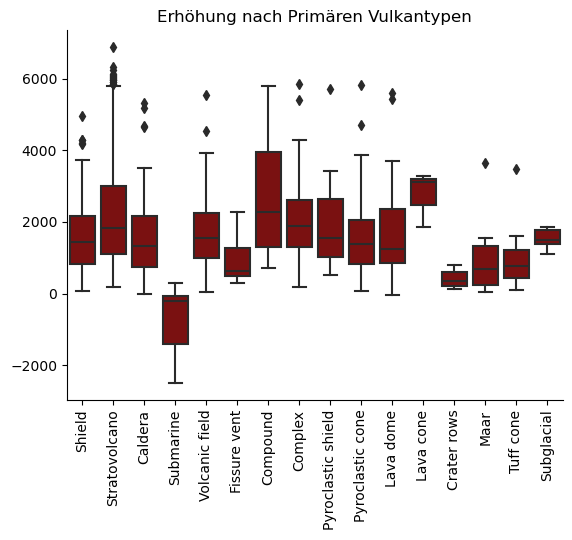

In [20]:
sns.boxplot(x='primary_volcano_type', y='elevation', data=volcano_simpler_types, color='darkred')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Erhöhung nach Primären Vulkantypen')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()